So today, I'm going to use the techniques I learnt yesterday and put them to this dataset

In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [73]:
df = pd.read_csv("/kaggle/input/housedata/data.csv")

In [74]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [75]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Medina                   11
Fall City                11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [76]:
df.country.value_counts()

#This column is useless

USA    4600
Name: country, dtype: int64

In [77]:
df.street.value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
2358 Fairview Ave E      2
1149-1199 91st Ave NE    2
17510 12th Ave NE        2
                        ..
12926 SE 23rd St         1
7901-7911 39th Ave SW    1
1211 NE 135th St         1
976 Jericho Pl NE        1
10320 NE 125th Pl        1
Name: street, Length: 4525, dtype: int64

In [78]:
df.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [79]:
df.date = df.date.apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))

In [80]:
df['year'] = df.date.dt.year

In [81]:
df['month'] = df.date.dt.month

In [82]:
gb_year = df.groupby('year')
gb_year.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
year,,,,,,,,,,,,,,
2014,551962.988473,3.40087,2.160815,2139.346957,14852.516087,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.757609


In [83]:
gb_month = df.groupby('month')
gb_month.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
month,,,,,,,,,,,,,,
5,533822.837768,3.389706,2.139847,2114.912896,15959.428167,1.493495,0.005656,0.247738,3.436086,1797.126131,317.786765,1970.586538,826.834842,2014.0
6,547968.179909,3.404773,2.164640,2133.363469,14262.325379,1.513538,0.008720,0.241854,3.459844,1822.765489,310.597981,1970.746214,812.791189,2014.0
7,614407.818959,3.418070,2.204824,2225.468606,13824.958652,1.557427,0.006126,0.217458,3.467075,1923.883614,301.584992,1971.460949,745.301685,2014.0


In [84]:
df["last_renov"] = df[["yr_built", "yr_renovated"]].max(axis=1)

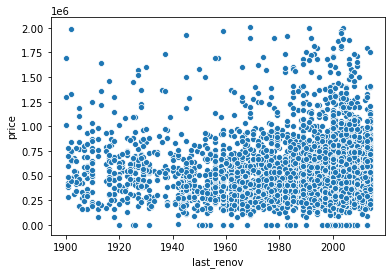

In [85]:
sns.scatterplot(x="last_renov", y="price", data=df[df["price"]  <= df["price"].quantile(.99)])

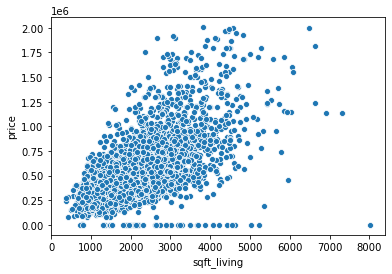

In [86]:
sns.scatterplot(x="sqft_living", y="price", data=df[df.price <= df.price.quantile(.99)])

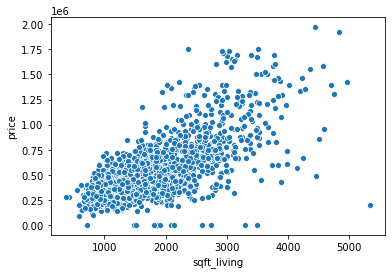

In [87]:
df_seattle = df[df.city == "Seattle"]
sns.scatterplot(x="sqft_living", y="price", data=df_seattle[df_seattle.price <= df_seattle.price.quantile(.99)])

In [92]:
df.groupby("last_renov").count()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
last_renov,,,,,,,,,,,,,,,,,,,,
1900,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1901,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1902,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1903,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1904,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
2011,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
2012,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78


In [99]:
idx = df.groupby("last_renov").count().index
idx

Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910,
            ...
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='last_renov', length=111)

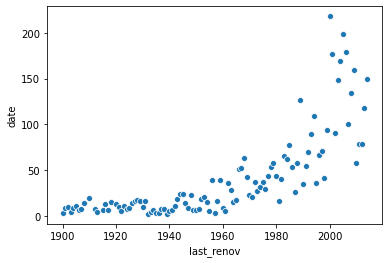

In [102]:
sns.scatterplot(x=idx, y ='date', data= df.groupby("last_renov").count())

There're features with string!!, I have no idea how to deal with it

In [ ]:

for col in output.columns:
    output[col] = pd.to_numeric(output[col],errors='coerce')

I should learn how to deal with string features tomorrow, but today I'm just gonna leave them

In [ ]:
data = output.fillna(0)
data

In [ ]:
data = data.drop(["date", "street", "city", "statezip", "country"], axis=1)

In [ ]:
correlation = data.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=0, cmap="Reds")

Dropping the yr_renovated, because it has no correlation with price

In [ ]:
data = data.drop(["yr_renovated"], axis = 1)

In [ ]:
data

In [ ]:
data.columns

In [ ]:
X = data.iloc[:,1:len(data.columns)]
Y = data["price"]

For today, I'm just gonna try to put the data into Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


**CONCLUSION:**
0.5 R2 Score, It looks so bad, I have to improve it tomorrow